В ходе исследования необхождимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Необходимо будет решить ряд задач:

1. Открыть файл с данными и изучить общую информацию
2. Подготовить данные
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверите гипотезы
6. Написать общий вывод 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
for column in data.columns:
    if data[column].dtype == 'object':
        display(data[column].value_counts())
    else:
        display(data[column].describe())

Need for Speed: Most Wanted                                         12
LEGO Marvel Super Heroes                                             9
FIFA 14                                                              9
Ratatouille                                                          9
Madden NFL 07                                                        9
                                                                    ..
Deal or No Deal: The Banker is Back!                                 1
Famicom Mini: Mario Bros.                                            1
Overlord: Minions                                                    1
Shirogane no Soleil: Contract to the Future - Mirai e no Keiyaku     1
Fancy Nancy: Tea Party Time!                                         1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.3       2
1         2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

## Подготовка данных 

### Переименование столбцов таблицы

Приведем все столбцы к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


### Преобразование данных

Преобразуем данные в столбце "year_of_release" из вещественных в целочисленные, т.к. год выпуска не может быть дробным. 
Выбираем тип Int64, т.к. в стобце присутствуют пропуски

In [6]:
data['year_of_release'] = data['year_of_release'].round(0).astype('Int64')

Преобразуем данные в столбце "user_score" в вещественные. В столбце встречаются значения столбца 'tbd'  - аббревиатура To be determined, т.е. "будет определено", логичным будет замена его на Nan, поэтому используем параметр errors='coerce':

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,T
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


### Обработка пропусков 

Подсчитаем общее количество пропусков в таблице по столбцам:

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим строки с пропущенным жанром и названием:

In [9]:
data = data.dropna(subset=['name','genre'])

Пропущенные значения года выпуска заменим медианным годом жизни платформы, для которой выпущена игра.

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform('median'))
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

В столбцах "name", "year_of_release", "genre" присутвуют пропуски, которые связаны скорее всего с некорректным сбором и формированием данных, количество пропусков незначительное.
Большое количество пропусков в столбцах "critic_score", "user_score", "rating" обусловллено вероятнее всего тем, что критики и пользователи не оценивали игры, а рейтнг для пропущенных игр не устанавливался, по каким-либо причинам. Корректно восстановить пропущенные значения не представляется возможным.

### Cуммарные продажи

Рассчитаем суммарные продажи во всех регионах и результат внесем в отдельный столбец:

In [11]:
data['world_sales'] = data.filter(like='sales').sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы.

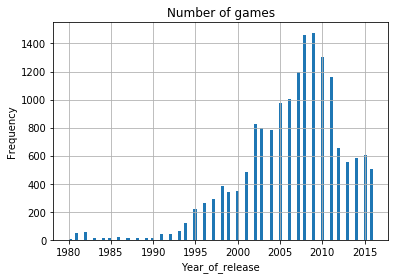

In [12]:
data['year_of_release'].hist(bins=100)
plt.title('Number of games')
plt.ylabel('Frequency')
plt.xlabel('Year_of_release')
plt.show()

Прирост количества игр начинается с 1993 года, пиковые значения достигнуты в 2008-2009 годах

### Динамика продаж по платформам. 

Построим диаграмму, на которой отражены продажи игр различных платформ в разрезе рассматриваемого периода времени:

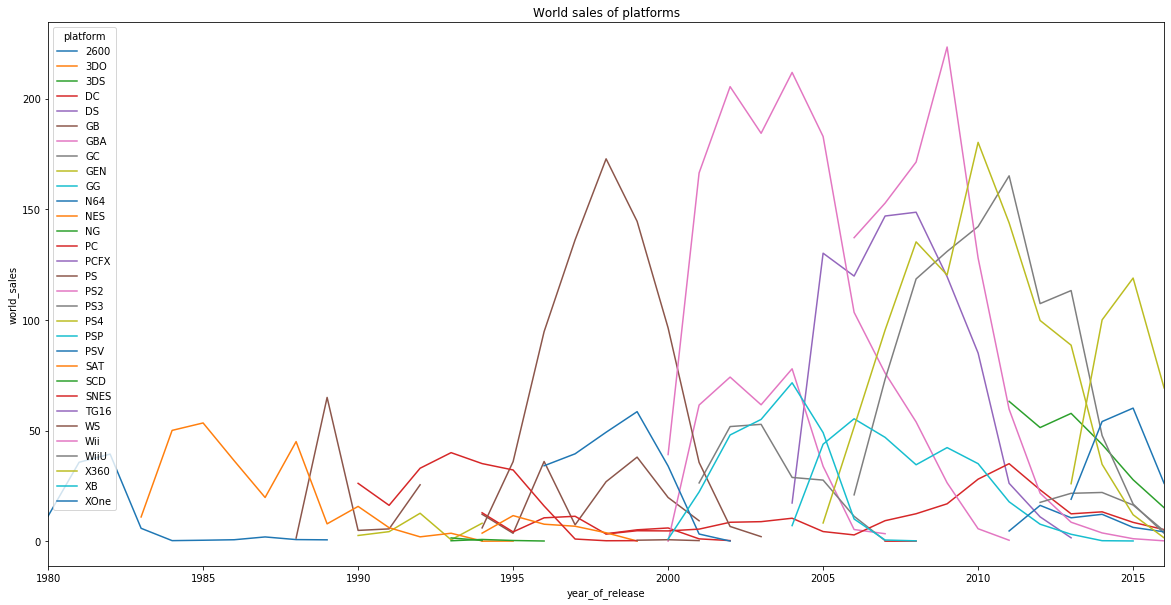

In [13]:
data.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum').plot(figsize=(20,10),title='World sales of platforms')
plt.ylabel('world_sales')
plt.show()

Продажи практически каждой платформы переживали стадии планомерного роста и последующего падения.
Для определения самых продаваемых платформ, сгруппируем и отсортируем продажи по платформам

In [14]:
grouped_platform = data.groupby('platform')['world_sales'].sum().sort_values(ascending=False)
grouped_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: world_sales, dtype: float64

Выделим в отдельный список платформы с продажами более 900 млн.копий и построим распределение по годам

Список популярных платформ, с продажами более 900 млн. копий: 
 ['PS2', 'X360', 'PS3', 'Wii']


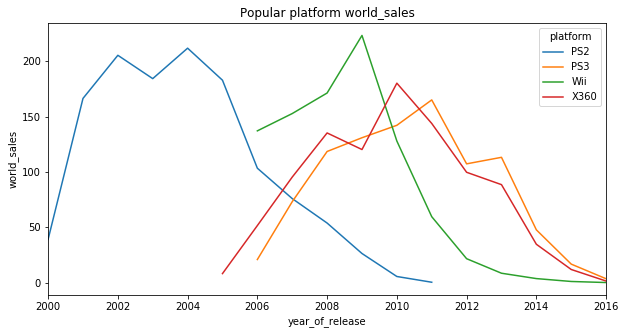

In [15]:
popular_platform =[]
for item in range(len(grouped_platform)):
    if grouped_platform[item] > 900:
        popular_platform.append(grouped_platform.index[item])
print('Список популярных платформ, с продажами более 900 млн. копий: \n',popular_platform)
data.query('platform in @popular_platform').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum').plot(figsize=(10,5))
plt.ylabel('world_sales')
plt.title('Popular platform world_sales')
plt.show()

Определим средний жизенный цикл платформ

In [16]:
def platform_life_cycle(platform_name):
    min_year = data.query('platform == @platform_name')['year_of_release'].min()
    max_year = data.query('platform == @platform_name')['year_of_release'].max()
    life_cycle = max_year-min_year
    print('Жизненный цикл платформы',platform_name,'равен',life_cycle,'лет')
    return life_cycle
c = 0
sum_life_cycle = 0
#for item in data['platform'].unique(): #- так можно посчитать средний жизненный цикл по всем платформам
for item in popular_platform:
    sum_life_cycle += platform_life_cycle(item)
    c += 1
print('\nСредний жизненный цикл популярных платформ(с продажами более 900 млн.копий) составляет',round(sum_life_cycle/c),'лет')

Жизненный цикл платформы PS2 равен 11 лет
Жизненный цикл платформы X360 равен 11 лет
Жизненный цикл платформы PS3 равен 10 лет
Жизненный цикл платформы Wii равен 10 лет

Средний жизненный цикл популярных платформ(с продажами более 900 млн.копий) составляет 10 лет


### Определение актуального периода

Поскольку данные за 2016 год могут быть неполными, определяем актуальный период в 3 года с 2013 до 2015 года, поскольку именно с 2013 года наблюдается появление последних платформ и имеющих тенденцию к развитию. С учетом среднего жизненного цикла в 10 лет, это может период 2013 по 2015 может рассмтариваться как период развития.

In [17]:
actual_period = [2013,2015]
#actual_data = data.query('year_of_release >= @actual_period[0] and year_of_release <= @actual_period[1]')
actual_data = data[(data['year_of_release'] >= actual_period[0]) & (data['year_of_release'] <= actual_period[1])]
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


Дальнейшие расчеты будем проводить для этого актуального периода

### Платформы-лидеры продаж

В актуальном периоде сгруппируем платформы по мировым суммарным продажам и сохраним в отдельную переменную:

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     129.30
WiiU     60.03
PC       34.18
PSV      29.00
Wii      13.48
PSP       3.50
DS        1.54
Name: world_sales, dtype: float64

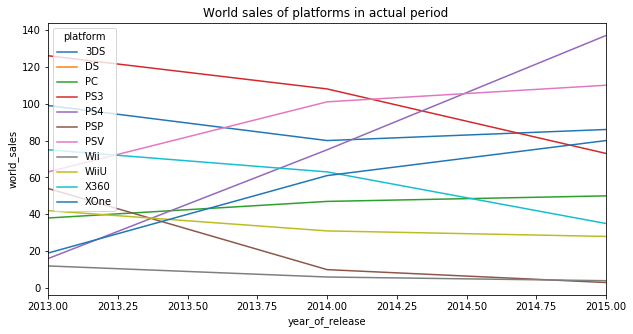

In [18]:
grouped_actual_data = actual_data.groupby('platform')['world_sales'].sum().sort_values(ascending=False)
display(grouped_actual_data)
actual_data.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='count').plot(figsize=(10,5))
plt.ylabel('world_sales')
plt.title('World sales of platforms in actual period ')
plt.show()

Можно выделить 5 лидирующих платформ с cуммарными мировыми продажами блоее 100 млн.копий. Часть из них находятся на стадии роста, а часть -на стадии падения продаж. Выделим ТОП5 популярных платформ, продажи которых составляют более 100 млн. копий:

Список популярных платформ, с продажами более 100 млн. копий: 
 ['PS4', 'PS3', 'X360', 'XOne', '3DS']


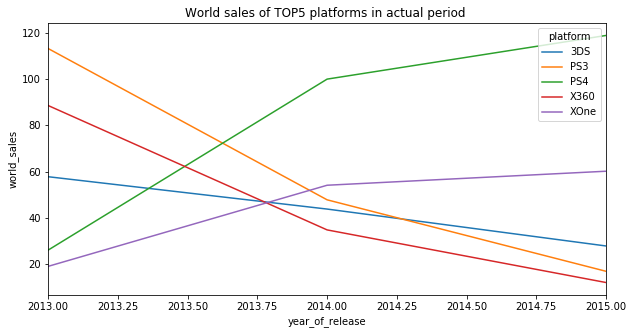

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2013,57.76,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14


In [19]:
popular_actual_platform =[]
for item in range(len(grouped_actual_data)):
    if grouped_actual_data[item] > 100:
        popular_actual_platform.append(grouped_actual_data.index[item])
print('Список популярных платформ, с продажами более 100 млн. копий: \n',popular_actual_platform)
actual_data.query('platform in @popular_actual_platform').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum').plot(figsize=(10,5))
plt.ylabel('world_sales')
plt.title('World sales of TOP5 platforms in actual period ')
plt.show()
actual_data.query('platform in @popular_actual_platform').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')

Список популярных платформ в актуальном периоде определен, однако из графика видно, что из 5ти ранее обозначенных, только 2 платформы имеют тенденции к росту продаж, остальные находятся на этапе завершения жизненного цикла платформы и ожидать от них роста не стоит. Поэтому в списке популярных платформ актуального периода остаются только 2 платформы:

In [20]:
popular_actual_platform = ['PS4', 'XOne']

### Анализ глобальных продаж игр в разбивке по платформам с с помощью графика «ящик с усами».

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


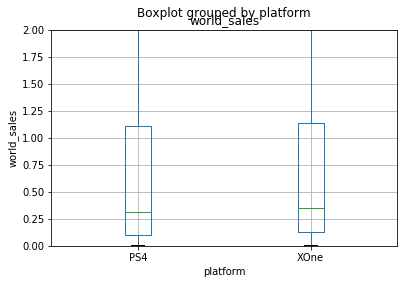

'PS4'

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: world_sales, dtype: float64

'XOne'

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: world_sales, dtype: float64

In [21]:
actual_data[actual_data['platform'].isin(popular_actual_platform)].boxplot( by='platform' , column='world_sales')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
plt.ylim([0,2])
plt.ylabel('world_sales')
plt.show()
for item in popular_actual_platform:
    display(item,actual_data.query('platform == @item')['world_sales'].describe())


Медианные значения у обеих платформ практически одинаковые, но у PS4 есть выбросы- высокие продажи популярных игр, которые повлияли на бОльшие суммарные продажи платформы. 

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

В качестве популярной платформы выберем платформу с максимальными продажами- PS4.
 
Построим диаграмму рассеяния зависимсости продаж от оценок критиков:

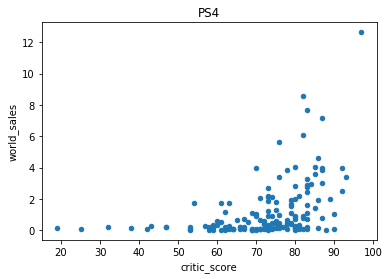

In [22]:
actual_data.query('platform == "PS4"').plot(x='critic_score',y='world_sales', kind = 'scatter', title='PS4')

Платформа PS4 имеет высокие продажи(более 2 млн. копий) по тем играм, по которым критики поставили оценку 70 и более.

Построим диаграмму рассеяния зависимсости продаж от оценок пользователей:

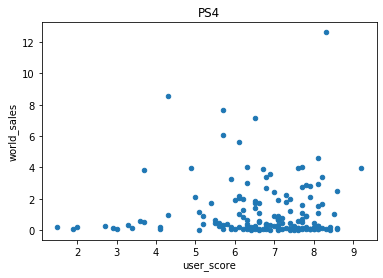

In [23]:
actual_data.query('platform == "PS4"').plot(x='user_score',y='world_sales', kind = 'scatter',title='PS4')

Платформа PS4 имеет высокие продажи(более 2 млн. копий) по тем играм, по которым пользователи поставили преимущественно оценку 6 и более

Для определения корреляции между отзывами и продажами, построим матрицу коррелиции:

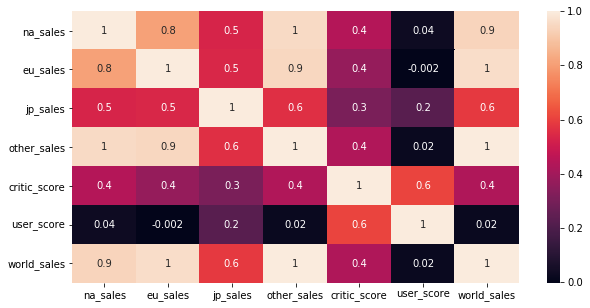

In [24]:
plt.figure(figsize=(10, 5))
heatmap_data_filtered = actual_data[['platform','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','world_sales']]
heatmap_data_filtered = seaborn.heatmap(heatmap_data_filtered.query('platform == "PS4"').corr(), annot=True, fmt = '.1g') 

Общие продажи платформы PS4 сильнее зависят от оценок критиков, нежели чем от оценок пользолвателей

### Продажи игр на других платформах. 

Построим диаграмму рассеяния зависимсости продаж от оценок критиков по другим платформам:

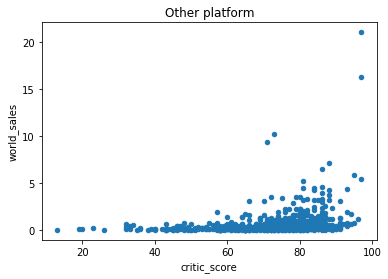

In [25]:
actual_data.query('platform != "PS4"').plot(x='critic_score',y='world_sales', kind = 'scatter', title='Other platform')

Остальные платформы имеют высокие продажи(более 3 млн. копий) по тем играм, по которым критики преимущественно поставили оценку  70 и более.

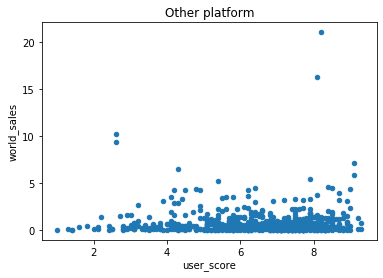

In [26]:
actual_data.query('platform != "PS4"').plot(x='user_score',y='world_sales', kind='scatter', title='Other platform')

Остальные платформы имеют высокие продажи(более 4 млн. копий) по тем играм, по которым пользователи преимущественно поставили оценку 4 и более.

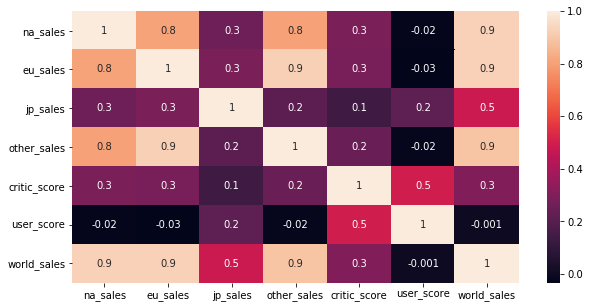

In [27]:
plt.figure(figsize=(10, 5))
heatmap_data_filtered = actual_data[['platform','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','world_sales']]
heatmap_data_filtered = seaborn.heatmap(heatmap_data_filtered.query('platform != "PS4"').corr(), annot=True, fmt = '.1g') 

Общие продажи по остальным платформам также сильнее зависят от оценок критиков, нежели чем от оценок пользолвателей.

### Общее распределение игр по жанрам.

В актуальном периоде сгруппируем суммарные мировые продажи по жанрам игр:

genre
Action          292.16
Shooter         194.83
Role-Playing    128.00
Sports          127.18
Misc             60.22
Platform         39.40
Racing           37.19
Fighting         30.84
Simulation       20.36
Adventure        19.91
Strategy          8.95
Puzzle            3.16
Name: world_sales, dtype: float64

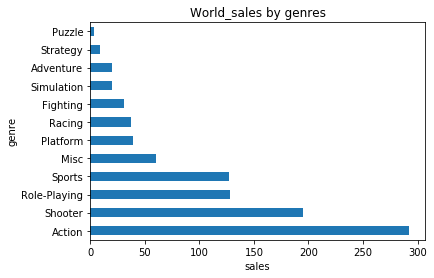

In [28]:
grouped_genre_actual_data = actual_data.groupby('genre')['world_sales'].sum().sort_values(ascending=False)
actual_data.groupby('genre')['world_sales'].sum().sort_values(ascending=False).plot(kind='barh', title='World_sales by genres')
plt.xlabel('sales')
grouped_genre_actual_data

Самые большие продажи у игр с жанром Action, самые маленькие - с жанром Puzzle.

## Портрет пользователя  

Определим для пользователя каждого региона (NA, EU, JP): <br/>
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br/>
•	Самые популярные жанры (топ-5). Поясните разницу.<br/>
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**• Определим самые популярные платформы:**

na_sales platform
PS4     87.25
X360    80.97
XOne    78.85
PS3     62.83
3DS     34.90
Name: na_sales, dtype: float64


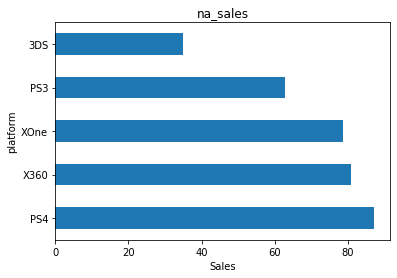

eu_sales platform
PS4     109.31
PS3      66.55
XOne     41.96
X360     41.81
3DS      28.84
Name: eu_sales, dtype: float64


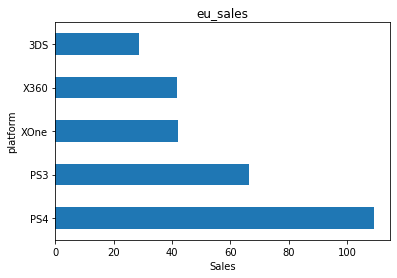

jp_sales platform
3DS     59.83
PS3     22.05
PSV     15.10
PS4     10.22
WiiU    10.21
Name: jp_sales, dtype: float64


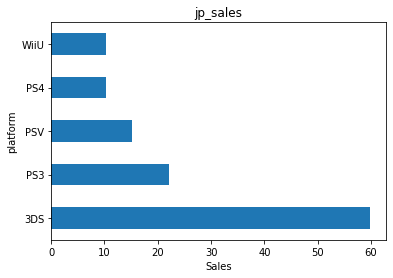

Доли продаж ТОП-5 платформ: 

 [platform
PS4     22.0
X360    21.0
XOne    20.0
PS3     16.0
3DS      9.0
Name: na_sales, dtype: float64, platform
PS4     32.0
PS3     20.0
XOne    12.0
X360    12.0
3DS      8.0
Name: eu_sales, dtype: float64, platform
3DS     49.0
PS3     18.0
PSV     12.0
PS4      8.0
WiiU     8.0
Name: jp_sales, dtype: float64]


In [29]:
columns_to_analize = ['na_sales','eu_sales','jp_sales']
top5 = [] # список для ТОП 5 платформ по регионам
region_sales = []  # список для формирования суммарных продаж по регионам
top5_sale_percent = [] # список для формирования доли продаж ТОП-5 платформ по регионам
c=0
for item in columns_to_analize:
    top5.append(actual_data.groupby('platform')[item].sum().sort_values(ascending=False).head()) # сформируем список списков ТОП 5 популярных платформ
    region_sales.append(actual_data[item].sum()) # суммируем продажи по всем платформам каждого региона
    top5_sale_percent.append(round(top5[c]/region_sales[c]*100,0)) # расчет доли продаж в процентах
    print(item,top5[c])
    c+=1
    plt.title(item)
    plt.xlabel('Sales')
    actual_data.groupby('platform')[item].sum().sort_values(ascending=False).head().plot(kind='barh')# выведем на экран ТОП 5 популярных платфор в зависимости от региона
    plt.show()
print('Доли продаж ТОП-5 платформ: \n\n',top5_sale_percent)

В США самая популярная платформа - PS4. <br/>
В Европейских странах - PS4. <br/>
В Японии - 3DS. <br/>

Самые большие продажи популярной платформы PS4 в Европе. Однако в Японии популярная платформа 3DS имеет самую большую долю продаж по сравнению с другими регионами.

In [30]:
regions = ['Северная Америка','Европа','Япония']
for item in range(len(columns_to_analize)):
    print('Доля ТОП-5 платформ региона',regions[item],'составляет',top5_sale_percent[item].sum(),'% от общих продаж в регионе')

Доля ТОП-5 платформ региона Северная Америка составляет 88.0 % от общих продаж в регионе
Доля ТОП-5 платформ региона Европа составляет 84.0 % от общих продаж в регионе
Доля ТОП-5 платформ региона Япония составляет 95.0 % от общих продаж в регионе


Продажи 5 самых популярных платформ составляет более 80% от общих продаж в регионах.

**• Определим самые популярные жанры игр:**

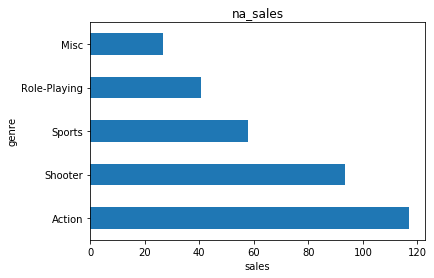

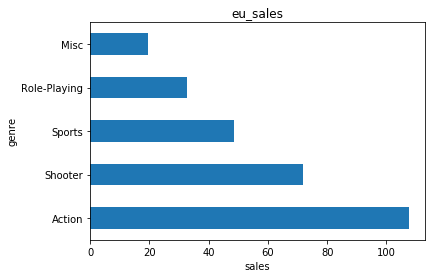

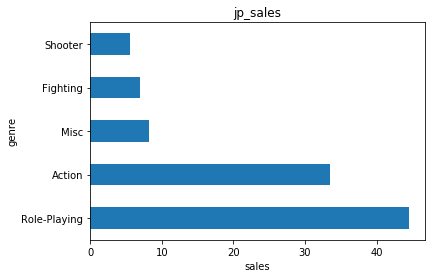

[genre
 Action          116.94
 Shooter          93.54
 Sports           57.73
 Role-Playing     40.62
 Misc             26.73
 Name: na_sales, dtype: float64,
 genre
 Action          107.64
 Shooter          71.98
 Sports           48.51
 Role-Playing     32.74
 Misc             19.38
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    44.53
 Action          33.42
 Misc             8.16
 Fighting         6.90
 Shooter          5.55
 Name: jp_sales, dtype: float64]

In [31]:
top5genre =[]
for item in columns_to_analize:
    top5genre.append(actual_data.groupby('genre')[item].sum().sort_values(ascending=False).head()) # сформируем список списков ТОП 5 популярных платформ
    plt.title(item)
    plt.xlabel('sales')
    actual_data.groupby('genre')[item].sum().sort_values(ascending=False).head().plot(kind='barh')# выведем на экран ТОП 5 популярных платфор в зависимости от региона
    plt.show()
top5genre    

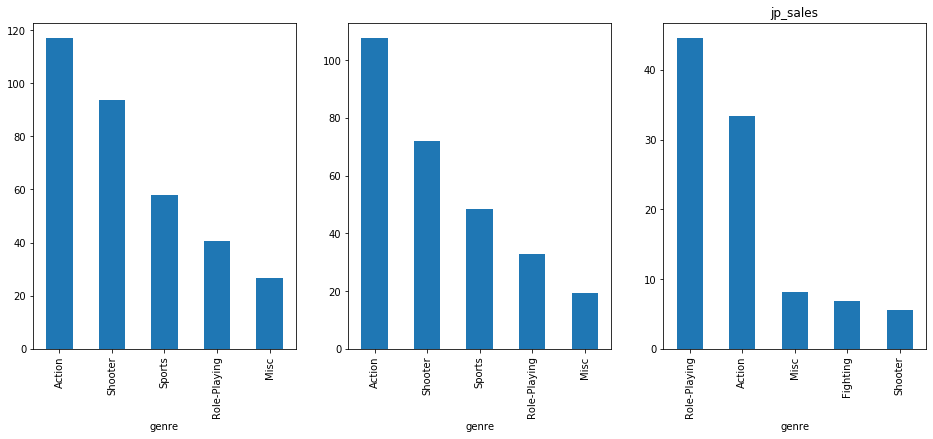

In [43]:
top5genre =[]
fig, axs = plt.subplots(1, 3, figsize=(16,6))
for item, ax in zip(columns_to_analize, axs):
    top5genre.append(actual_data.groupby('genre')[item].sum().sort_values(ascending=False).head()) # сформируем список списков ТОП 5 популярных платформ
    plt.title(item)
    plt.xlabel('sales')
    actual_data.groupby('genre')[item].sum().sort_values(ascending=False).head().plot(kind='bar', ax=ax)# выведем на экран ТОП 5 популярных платфор в зависимости от региона
plt.show()

В США и Европе самый популярный жанр игры - Action, в то время как в Японии - это Role-Playing   

**• Влияние рейтинга ESRB на продажи в отдельном регионе**

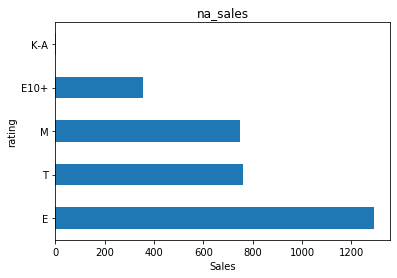

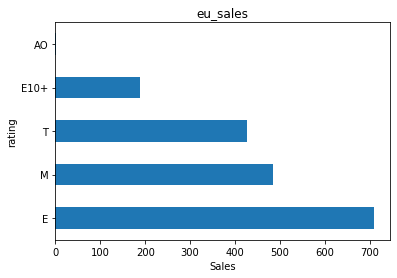

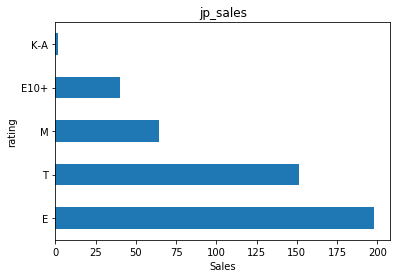

In [33]:
top_rating =[]
for item in columns_to_analize:
    top_rating.append(data.groupby('rating')[item].sum().sort_values(ascending=False).head()) # сформируем список списков ТОП 5 популярных платформ
    plt.title(item)
    plt.xlabel('Sales')
    data.groupby('rating')[item].sum().sort_values(ascending=False).head().plot(kind='barh')# выведем на экран ТОП 5 популярных платфор в зависимости от региона
    plt.show()

    Самые популярные игры во всех регионах - это игры рейтинга «E» («Everyone») — «Для всех», т.к. охватывает и детей 6+ и взрослых. Продажи игр этой категории в Северной Америке почти в 2 раза больше чем в Европе и почти в 6 раз больше чем в Японии. В США и Японии на втором месте игры рейтинга «T» («Teen») — «Подросткам»: 13+, на третьем месте игры  ретинга «M» («Mature») — «Для взрослых» 17+.В Европе же наоборот-  на втором месте игры рейтинга М, на третьем -рейтинга Т



## Проверка гипотез

Проверим 2 гипотезы:

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br/>
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:** <br/>

Сформируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны, тогда как алтернативая гипотеза будет звучать: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Сформируем рейтинги платформ Xbox One и PC, избавившись от пропусков

In [34]:
user_score_xbox_one = actual_data.query('platform == "XOne"')['user_score']
user_score_xbox_one = user_score_xbox_one.dropna()
user_score_pc = actual_data.query('platform == "PC"')['user_score']
user_score_pc = user_score_pc.dropna()

Проверим дисперсии значений рейтингов платформ:

In [35]:
display('Дисперсия значениий рейтингов Xbox One:',user_score_xbox_one.var().round(2),'Дисперсия значениий рейтингов PC:',user_score_pc.var().round(2))

'Дисперсия значениий рейтингов Xbox One:'

1.66

'Дисперсия значениий рейтингов PC:'

3.07

Выборки имеют разные дисперсии, поэтому для устанавливаем параметр equal_var = False

In [36]:
alpha = 0.05 
results = st.ttest_ind(user_score_xbox_one,user_score_pc,equal_var = False)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу") 
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


Таким образом алтернативная гипотеза верна: средние пользовательские рейтинги платформ Xbox One и PC разные.

**•	Средние пользовательские рейтинги жанров Action и Sports разные.**

Сформируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports равны, тогда как алтернативая гипотеза будет звучать: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем рейтинги жанров Action и Sports, избавившись от пропусков

In [37]:
genre_action = actual_data.query('genre == "Action"')['user_score']
genre_action = genre_action.dropna()
genre_sports = actual_data.query('genre == "Sports"')['user_score']
genre_sports = genre_sports.dropna()

Проверим дисперсии значений рейтингов жанров:

In [38]:
display('Дисперсия значениий рейтингов Action:',genre_action.var().round(2),'Дисперсия значениий рейтингов Sports:',genre_sports.var().round(2))

'Дисперсия значениий рейтингов Action:'

1.65

'Дисперсия значениий рейтингов Sports:'

2.9

Выборки имеют разные дисперсии, поэтому для устанавливаем параметр equal_var = False

In [39]:
alpha = 0.05 
results = st.ttest_ind(genre_action,genre_sports,equal_var = False)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу") 
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.6032734667153843e-19
Отвергаем нулевую гипотезу


Таким образом подтверждается альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

   ## Общий вывод
   
   В ходе исследования была обработана информация о продажах игр различных платформ за период времени с 1980 по 2016 г. Рассчитаны общие продажи платформ во всех регионах. Выявлены самые популярные, исходя из высоких продаж, платформы. Определен средний жизненный цикл популярных платформ, который составил 10 лет.<br/>
   Учитывая современные реалии, определено, что самой популярной актуальной игровой платформой является PS4.
   Удалось выяснить, продажи зависят от жанра игры, так, самыми популярными жанрами являются: Action(в США и Европе) и Role-Playing(в Японии).<br/>
   
   Продажи игр в большей степени зависит от оценки крититиков, нежели чем от оценок пользователей. Это можно объяснить тем, что пользователи при выборе игры ориентируются на отзывы и обзоры критиков.<br/>
   
   Самым популярным возрастным рейтингом компьютерных игр является рейтинг «E» («Everyone») — «Для всех», он охватывает большую аудиторию: и детей 6+ и взрослых. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 